<a href="https://colab.research.google.com/github/MaxiJernej/HTML/blob/main/Face%20Swap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://drive.google.com/file/d/1BnIWEekAqpireVJ3K4nxPcOP4byUvKN6/view?usp=sharing

**Mount your Google drive folder on Colab**

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Load source image (only single face allowed)**

In [3]:
import imageio
import numpy as np
from skimage.transform import resize
import warnings
from argparse import Namespace
import time
import sys
from PIL import Image
import cv2

vidcap = cv2.VideoCapture('/content/gdrive/MyDrive/Face Detection/IMG-2237-Neu.mp4') # imports video 
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite("/content/gdrive/MyDrive/Face Detection/Frames/frame%d.jpg" % count, image) #saves frames as JPEG file      
  success,image = vidcap.read()
  print('Read a new frame: ', success)
  count += 1

warnings.filterwarnings("ignore")

# Path of your original photo
##image_path = '/content/Foto Maximilian Jernej.jpg'
##source_image = Image.open(image_path)

# Load video
#target_video = imageio.mimread('/content/gdrive/My Drive/motion-supervised-co-segmentation/04.mp4')

# Resize image to 256x256 if needed
#source_image = source_image.resize((256,256),Image.ANTIALIAS)
##source_image


Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

# Neuer Abschnitt

import cv2
vidcap = cv2.VideoCapture('big_buck_bunny_720p_5mb.mp4')
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite("frame%d.jpg" % count, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  print('Read a new frame: ', success)
  count += 1import cv2
vidcap = cv2.VideoCapture('big_buck_bunny_720p_5mb.mp4')
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite("frame%d.jpg" % count, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  print('Read a new frame: ', success)
  count += 1import cv2
vidcap = cv2.VideoCapture('big_buck_bunny_720p_5mb.mp4')
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite("frame%d.jpg" % count, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  print('Read a new frame: ', success)
  count += 1import cv2
vidcap = cv2.VideoCapture('big_buck_bunny_720p_5mb.mp4')
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite("frame%d.jpg" % count, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  print('Read a new frame: ', success)
  count += 1import cv2
vidcap = cv2.VideoCapture('big_buck_bunny_720p_5mb.mp4')
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite("frame%d.jpg" % count, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  print('Read a new frame: ', success)
  count += 1import cv2
vidcap = cv2.VideoCapture('big_buck_bunny_720p_5mb.mp4')
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite("frame%d.jpg" % count, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  print('Read a new frame: ', success)
  count += 1
  import cv2
vidcap = cv2.VideoCapture('big_buck_bunny_720p_5mb.mp4')
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite("frame%d.jpg" % count, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  print('Read a new frame: ', success)
  count += 1
  
  
  
  
  
  
  
  
  
  
  ddfsdfdfsdfsdfdoffdsafdfdsfhdsfjdshöjjjdfdsfdfdsmmddddddsfdsfdfsdfdsfsdakjfdfksfkdkfksjdskfjsdköfjdsfjsdkfjjjjjkkmfmmmmmjfjfjfjfjf### Align Image

Note: in this notebook we'll run alignment on the input image. 

In [4]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -dk shape_predictor_68_face_landmarks.dat.bz2

--2022-07-21 06:14:14--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  81.4MB/s    in 0.8s    

2022-07-21 06:14:15 (81.4 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



In [5]:
import scipy
import scipy.ndimage
import dlib
from PIL import Image
import PIL.Image

def get_landmark(filepath, predictor):
  detector = dlib.get_frontal_face_detector() #Returns the default face detector
  img = dlib.load_rgb_image(filepath) #Takes a path and returns a numpy array (RGB) containing the image
  dets = detector(img, 1) #generates an enum variable

  for k, d in enumerate(dets): #loops an enum which contains the images and there indexes?
    shape = predictor(img, d) 
  t = shape.parts()
  a = []
  for tt in t:
    a.append([tt.x, tt.y])
  lm = np.array(a)
  return lm

def align_face(filepath, predictor,x_scale=1, y_scale=1):

  lm = get_landmark(filepath, predictor)

  #makes landmarks for every portion in the face
  lm_chin = lm[0: 17]  # left-right
  lm_eyebrow_left = lm[17: 22]  # left-right
  lm_eyebrow_right = lm[22: 27]  # left-right
  lm_nose = lm[27: 31]  # top-down
  lm_nostrils = lm[31: 36]  # top-down
  lm_eye_left = lm[36: 42]  # left-clockwise
  lm_eye_right = lm[42: 48]  # left-clockwise
  lm_mouth_outer = lm[48: 60]  # left-clockwise
  lm_mouth_inner = lm[60: 68]  # left-clockwise

  # Calculate auxiliary vectors.
  eye_left = np.mean(lm_eye_left, axis=0)
  eye_right = np.mean(lm_eye_right, axis=0)
  eye_avg = (eye_left + eye_right) * 0.5
  eye_to_eye = eye_right - eye_left
  mouth_left = lm_mouth_outer[0]
  mouth_right = lm_mouth_outer[6]
  mouth_avg = (mouth_left + mouth_right) * 0.5
  eye_to_mouth = mouth_avg - eye_avg

  # Choose oriented crop rectangle.
  x = eye_to_eye - np.flipud(eye_to_mouth) * [-1, 1]
  x /= np.hypot(*x)
  x *= max(np.hypot(*eye_to_eye) * 2.0, np.hypot(*eye_to_mouth) * 1.8)
  x *= x_scale
  y = np.flipud(x) * [-y_scale, y_scale]
  c = eye_avg + eye_to_mouth * 0.1
  quad = np.stack([c - x - y, c - x + y, c + x + y, c + x - y])
  qsize = np.hypot(*x) * 2

  # read image
  img = Image.open(filepath)

  output_size = 256
  transform_size = 256
  enable_padding = True

  # Shrink.
  shrink = int(np.floor(qsize / output_size * 0.5))
  if shrink > 1:
    rsize = (int(np.rint(float(img.size[0]) / shrink)), int(np.rint(float(img.size[1]) / shrink)))
    img = img.resize(rsize, PIL.Image.ANTIALIAS)
    quad /= shrink
    qsize /= shrink

  # Crop.
  border = max(int(np.rint(qsize * 0.1)), 3)
  crop = (int(np.floor(min(quad[:, 0]))), int(np.floor(min(quad[:, 1]))), int(np.ceil(max(quad[:, 0]))),
      int(np.ceil(max(quad[:, 1]))))
  crop = (max(crop[0] - border, 0), max(crop[1] - border, 0), min(crop[2] + border, img.size[0]),
      min(crop[3] + border, img.size[1]))
  if crop[2] - crop[0] < img.size[0] or crop[3] - crop[1] < img.size[1]:
    img = img.crop(crop) #cordinates to crop the image
    quad -= crop[0:2]

  # Pad.
  pad = (int(np.floor(min(quad[:, 0]))), int(np.floor(min(quad[:, 1]))), int(np.ceil(max(quad[:, 0]))),
        int(np.ceil(max(quad[:, 1]))))
  pad = (max(-pad[0] + border, 0), max(-pad[1] + border, 0), max(pad[2] - img.size[0] + border, 0),
        max(pad[3] - img.size[1] + border, 0))
  if enable_padding and max(pad) > border - 4:
    pad = np.maximum(pad, int(np.rint(qsize * 0.3)))
    img = np.pad(np.float32(img), ((pad[1], pad[3]), (pad[0], pad[2]), (0, 0)), 'reflect')
    h, w, _ = img.shape
    y, x, _ = np.ogrid[:h, :w, :1]
    mask = np.maximum(1.0 - np.minimum(np.float32(x) / pad[0], np.float32(w - 1 - x) / pad[2]),
              1.0 - np.minimum(np.float32(y) / pad[1], np.float32(h - 1 - y) / pad[3]))
    blur = qsize * 0.02
    img += (scipy.ndimage.gaussian_filter(img, [blur, blur, 0]) - img) * np.clip(mask * 3.0 + 1.0, 0.0, 1.0)
    img += (np.median(img, axis=(0, 1)) - img) * np.clip(mask, 0.0, 1.0)
    img = Image.fromarray(np.uint8(np.clip(np.rint(img), 0, 255)), 'RGB')
    quad += pad[:2]

  # Transform.
  img = img.transform((transform_size, transform_size), Image.QUAD, (quad + 0.5).flatten(), Image.BILINEAR)
  if output_size < transform_size:
    img = img.resize((output_size, output_size), Image.ANTIALIAS)

  # Return aligned image.
  return img




In [6]:
import cv2
from PIL import Image
import PIL.Image
import os

#counts how many data points are in a specific folder
initial_count = 0
dir = "/content/gdrive/MyDrive/Face Detection/Frames"
for path in os.listdir(dir):
    if os.path.isfile(os.path.join(dir, path)):
        initial_count += 1
print(initial_count)
print(str(initial_count) + " frames will be transformed, it can take about " + str(initial_count*3)  + " seconds. Enjoy a coffee (:")


def run_alignment(src_img):
  import dlib
  predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
  aligned_image = align_face(imageURL, predictor=predictor,x_scale=1.0, y_scale=1.0) 
  print("Aligned image has shape: {}".format(aligned_image.size))
  return aligned_image

count=0
squaredframes = []
path_list =[]
#running through every frame and changing the alignment of the face
for x in range(0, initial_count):
  x= str(x)
  imageURL = "/content/gdrive/MyDrive/Face Detection/Frames/frame" + x + ".jpg"
  imageURLsaving = "/content/gdrive/MyDrive/Face Detection/Squared Frames/frame" + x + ".jpg"
  path_list.append(imageURLsaving)
  #Hier muss ich die Frames wieder einlesen
  input_image = run_alignment(Image.open(imageURL))
  input_image.resize((256, 256))
  input_image_RGB = input_image.convert('RGB')
  #Save the squared frames in the folder
  filename_squared = '/content/gdrive/MyDrive/Face Detection/Squared Frames/frame'+x+'.jpg'
  input_image_RGB.save(filename_squared)    #https://www.geeksforgeeks.org/python-pil-image-save-method/    
  print('saving squared new frame: ')
  count += 1
  #Saving all frames in a list 
  squaredframes.append(Image.open(filename_squared))









96
96 frames will be transformed, it can take about 288 seconds. Enjoy a coffee (:
Aligned image has shape: (256, 256)
saving squared new frame: 
Aligned image has shape: (256, 256)
saving squared new frame: 
Aligned image has shape: (256, 256)
saving squared new frame: 
Aligned image has shape: (256, 256)
saving squared new frame: 
Aligned image has shape: (256, 256)
saving squared new frame: 
Aligned image has shape: (256, 256)
saving squared new frame: 
Aligned image has shape: (256, 256)
saving squared new frame: 
Aligned image has shape: (256, 256)
saving squared new frame: 
Aligned image has shape: (256, 256)
saving squared new frame: 
Aligned image has shape: (256, 256)
saving squared new frame: 
Aligned image has shape: (256, 256)
saving squared new frame: 
Aligned image has shape: (256, 256)
saving squared new frame: 
Aligned image has shape: (256, 256)
saving squared new frame: 
Aligned image has shape: (256, 256)
saving squared new frame: 
Aligned image has shape: (256, 256)

In [7]:
from moviepy.editor import *
from pathlib import Path



img_clips = []
#creates slide for each image
for img_path in path_list:
    slide = ImageClip(img_path, duration=0.042) 
    img_clips.append(slide)

video_slides = concatenate_videoclips(img_clips, method='compose') #verbinden der frames zu einem video
video_slides.write_videofile("/content/gdrive/MyDrive/Face Detection/Finished Video/output_video.mp4", fps=24)

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)3080192/45929032 bytes (6.7%)7012352/45929032 bytes (15.3%)11214848/45929032 bytes (24.4%)15171584/45929032 bytes (33.0%)19316736/45929032 bytes (42.1%)23355392/45929032 bytes (50.9%)27467776/45929032 bytes (59.8%)31522816/45929032 bytes (68.6%)35643392/45929032 bytes (77.6%)39845888/45929032 bytes (86.8%)43941888/45929032 bytes (95.7%)45929032/45929032 bytes (100.0%)
  Done
File saved as /root

100%|██████████| 97/97 [00:00<00:00, 114.93it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Face Detection/Finished Video/output_video.mp4 



**Clone repository**

In [8]:
!git clone https://github.com/AliaksandrSiarohin/motion-cosegmentation motion-co-seg

Cloning into 'motion-co-seg'...
remote: Enumerating objects: 106, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 106 (delta 20), reused 13 (delta 13), pack-reused 75
Receiving objects: 100% (106/106), 42.61 MiB | 36.73 MiB/s, done.
Resolving deltas: 100% (37/37), done.


In [9]:
cd motion-co-seg/

/content/motion-co-seg


**Mount your Google drive folder on Colab**

In [10]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Load target video and source image**

In [11]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage.transform import resize
from IPython.display import HTML
import warnings
from argparse import Namespace
import time
import sys
import pprint

warnings.filterwarnings("ignore")

image_path = '/content/gdrive/MyDrive/Face Detection/LeonardoDiCaprio.jpg'
source_image = imageio.imread(image_path) # here you need to put the path of your image

#source_image = imageio.imread('/content/gdrive/My Drive/motion-supervised-co-segmentation/16.png')
target_video = imageio.mimread('/content/gdrive/MyDrive/Face Detection/Finished Video/output_video.mp4')

#Resize image and video to 256x256

source_image = resize(source_image, (256, 256))[..., :3]
target_video = [resize(frame, (256, 256))[..., :3] for frame in target_video]

def display(source, target, generated=None):
    fig = plt.figure(figsize=(8 + 4 * (generated is not None), 6))

    ims = []
    for i in range(len(target)):
        cols = [source]
        cols.append(target[i])
        if generated is not None:
            cols.append(generated[i])
        im = plt.imshow(np.concatenate(cols, axis=1), animated=True)
        plt.axis('off')
        ims.append([im])

    ani = animation.ArtistAnimation(fig, ims, interval=50, repeat_delay=1000)
    plt.close()
    return ani
    

HTML(display(source_image, target_video).to_html5_video()) #a way to dislaly two images/videos 

### Align Image

Note: in this notebook we'll run alignment on the input image. 

In [12]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -dk shape_predictor_68_face_landmarks.dat.bz2

--2022-07-21 06:19:32--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  77.6MB/s    in 0.8s    

2022-07-21 06:19:33 (77.6 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



Aligned image has shape: (256, 256)


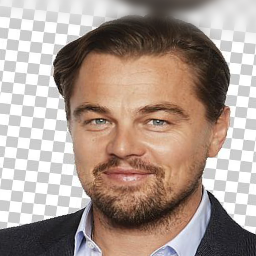

In [13]:
import scipy
import scipy.ndimage
import dlib
from PIL import Image

def get_landmark(filepath, predictor):
  detector = dlib.get_frontal_face_detector()
  img = dlib.load_rgb_image(filepath)
  dets = detector(img, 1)

  for k, d in enumerate(dets):
    shape = predictor(img, d)

  t = list(shape.parts())
  a = []
  for tt in t:
    a.append([tt.x, tt.y])
  lm = np.array(a)
  return lm

def align_face(filepath, predictor,x_scale=1, y_scale=1):

  lm = get_landmark(filepath, predictor)

  lm_chin = lm[0: 17]  # left-right
  lm_eyebrow_left = lm[17: 22]  # left-right
  lm_eyebrow_right = lm[22: 27]  # left-right
  lm_nose = lm[27: 31]  # top-down
  lm_nostrils = lm[31: 36]  # top-down
  lm_eye_left = lm[36: 42]  # left-clockwise
  lm_eye_right = lm[42: 48]  # left-clockwise
  lm_mouth_outer = lm[48: 60]  # left-clockwise
  lm_mouth_inner = lm[60: 68]  # left-clockwise

  # Calculate auxiliary vectors.
  eye_left = np.mean(lm_eye_left, axis=0)
  eye_right = np.mean(lm_eye_right, axis=0)
  eye_avg = (eye_left + eye_right) * 0.5
  eye_to_eye = eye_right - eye_left
  mouth_left = lm_mouth_outer[0]
  mouth_right = lm_mouth_outer[6]
  mouth_avg = (mouth_left + mouth_right) * 0.5
  eye_to_mouth = mouth_avg - eye_avg

  # Choose oriented crop rectangle.
  x = eye_to_eye - np.flipud(eye_to_mouth) * [-1, 1]
  x /= np.hypot(*x)
  x *= max(np.hypot(*eye_to_eye) * 2.0, np.hypot(*eye_to_mouth) * 1.8)
  x *= x_scale
  y = np.flipud(x) * [-y_scale, y_scale]
  c = eye_avg + eye_to_mouth * 0.1
  quad = np.stack([c - x - y, c - x + y, c + x + y, c + x - y])
  qsize = np.hypot(*x) * 2

  # read image
  img = Image.open(filepath)

  output_size = 256
  transform_size = 256
  enable_padding = True

  # Shrink.
  shrink = int(np.floor(qsize / output_size * 0.5))
  if shrink > 1:
    rsize = (int(np.rint(float(img.size[0]) / shrink)), int(np.rint(float(img.size[1]) / shrink)))
    img = img.resize(rsize, PIL.Image.ANTIALIAS)
    quad /= shrink
    qsize /= shrink

  # Crop.
  border = max(int(np.rint(qsize * 0.1)), 3)
  crop = (int(np.floor(min(quad[:, 0]))), int(np.floor(min(quad[:, 1]))), int(np.ceil(max(quad[:, 0]))),
      int(np.ceil(max(quad[:, 1]))))
  crop = (max(crop[0] - border, 0), max(crop[1] - border, 0), min(crop[2] + border, img.size[0]),
      min(crop[3] + border, img.size[1]))
  if crop[2] - crop[0] < img.size[0] or crop[3] - crop[1] < img.size[1]:
    img = img.crop(crop)
    quad -= crop[0:2]

  # Pad.
  pad = (int(np.floor(min(quad[:, 0]))), int(np.floor(min(quad[:, 1]))), int(np.ceil(max(quad[:, 0]))),
        int(np.ceil(max(quad[:, 1]))))
  pad = (max(-pad[0] + border, 0), max(-pad[1] + border, 0), max(pad[2] - img.size[0] + border, 0),
        max(pad[3] - img.size[1] + border, 0))
  if enable_padding and max(pad) > border - 4:
    pad = np.maximum(pad, int(np.rint(qsize * 0.3)))
    img = np.pad(np.float32(img), ((pad[1], pad[3]), (pad[0], pad[2]), (0, 0)), 'reflect')
    h, w, _ = img.shape
    y, x, _ = np.ogrid[:h, :w, :1]
    mask = np.maximum(1.0 - np.minimum(np.float32(x) / pad[0], np.float32(w - 1 - x) / pad[2]),
              1.0 - np.minimum(np.float32(y) / pad[1], np.float32(h - 1 - y) / pad[3]))
    blur = qsize * 0.02
    img += (scipy.ndimage.gaussian_filter(img, [blur, blur, 0]) - img) * np.clip(mask * 3.0 + 1.0, 0.0, 1.0)
    img += (np.median(img, axis=(0, 1)) - img) * np.clip(mask, 0.0, 1.0)
    img = Image.fromarray(np.uint8(np.clip(np.rint(img), 0, 255)), 'RGB')
    quad += pad[:2]

  # Transform.
  img = img.transform((transform_size, transform_size), Image.QUAD, (quad + 0.5).flatten(), Image.BILINEAR)
  if output_size < transform_size:
    img = img.resize((output_size, output_size), Image.ANTIALIAS)

  # Save aligned image.
  return img


def run_alignment(image_path):
  import dlib
  predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
  src_img = Image.open(image_path)
  aligned_image = align_face(image_path, predictor=predictor,x_scale=1.1, y_scale=1.1)
  print("Aligned image has shape: {}".format(aligned_image.size))
  return aligned_image

input_image = run_alignment(image_path)
input_image.resize((256, 256))
input_image_RGB = input_image.convert('RGB')
input_image_RGB

**Loading checkpoints with 10 parts**

In [14]:
from part_swap import load_checkpoints

reconstruction_module, segmentation_module = load_checkpoints(config='config/vox-256-sem-10segments.yaml', 
                                               checkpoint='/content/gdrive/My Drive/motion-supervised-co-segmentation/vox-10segments.pth.tar',
                                               blend_scale=1)

**Visualizing the segmentation**

In [15]:
import torch
print(torch.__version__)

1.12.0+cu113


(256, 256, 11)


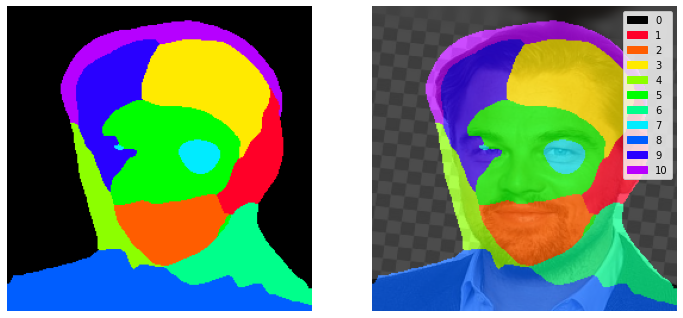

In [16]:
import torch
import torch.nn.functional as F
import io
from scipy.io import savemat

import matplotlib.patches as mpatches

def visualize_segmentation(image, network, supervised=False, hard=True, colormap='gist_rainbow'):
    with torch.no_grad():
        inp = torch.tensor(image[np.newaxis].astype(np.float32)).permute(0, 3, 1, 2).cuda()
        if supervised:
            inp = F.interpolate(inp, size=(512, 512))
            inp = (inp - network.mean) / network.std
            mask = torch.softmax(network(inp)[0], dim=1)
            mask = F.interpolate(mask, size=image.shape[:2])
        else:
            mask = network(inp)['segmentation']
            mask = F.interpolate(mask, size=image.shape[:2], mode='bilinear')
    
    if hard:
        mask = (torch.max(mask, dim=1, keepdim=True)[0] == mask).float()
    
    colormap = plt.get_cmap(colormap)
    num_segments = mask.shape[1]
    mask = mask.squeeze(0).permute(1, 2, 0).cpu().numpy()
    print(mask.shape)
    
    color_mask = 0
    patches = []
    for i in range(num_segments):
        if i != 0:
            color = np.array(colormap((i - 1) / (num_segments - 1)))[:3]
        else:
            color = np.array((0, 0, 0))
        patches.append(mpatches.Patch(color=color, label=str(i)))
        color_mask += mask[..., i:(i+1)] * color.reshape(1, 1, 3)
    
    fig, ax = plt.subplots(1, 2, figsize=(12,6))

    ax[0].imshow(color_mask)
    ax[1].imshow(0.3 * image + 0.7 * color_mask)
    ax[1].legend(handles=patches)
    ax[0].axis('off')
    ax[1].axis('off')

visualize_segmentation(np.array(input_image)/255.0, segmentation_module, hard=True)
plt.show()

**Identify index of the part that you want to swap. For example to make trump with red lips part 2 should be used**

In [17]:
from part_swap import make_video

predictions = make_video(swap_index=[1,2,3,4,5,7,9,10], source_image = np.array(input_image)/255.0, target_video = target_video,
                             segmentation_module=segmentation_module, reconstruction_module=reconstruction_module)
HTML(display(source_image, target_video, predictions).to_html5_video()) #here we can input the regions that we want to change

100%|██████████| 97/97 [00:05<00:00, 16.98it/s]


In [18]:
# Saving result video
from skimage import img_as_ubyte
imageio.mimsave('../result.mp4', [img_as_ubyte(frame) for frame in predictions], fps=30)

**Changing eye color**

In [19]:
source_image = imageio.imread('/content/gdrive/My Drive/motion-supervised-co-segmentation/26.png')
target_video = imageio.mimread('/content/gdrive/My Drive/motion-supervised-co-segmentation/11.mp4')
source_image = resize(source_image, (256, 256))[..., :3]
target_video = [resize(frame, (256, 256))[..., :3] for frame in target_video]

predictions = make_video(swap_index=[7,9], source_image = source_image, target_video = target_video,
                             segmentation_module=segmentation_module, reconstruction_module=reconstruction_module)
HTML(display(source_image, target_video, predictions).to_html5_video())

100%|██████████| 109/109 [00:04<00:00, 22.48it/s]


In [20]:
del predictions
del source_image
del target_video
del reconstruction_module
del segmentation_module

**Examples with 5-segments model**

In [21]:
from part_swap import load_checkpoints

reconstruction_module, segmentation_module = load_checkpoints(config='config/vox-256-sem-5segments.yaml', 
                                               checkpoint='/content/gdrive/My Drive/motion-supervised-co-segmentation/vox-5segments.pth.tar',
                                               blend_scale=1)

(256, 256, 6)


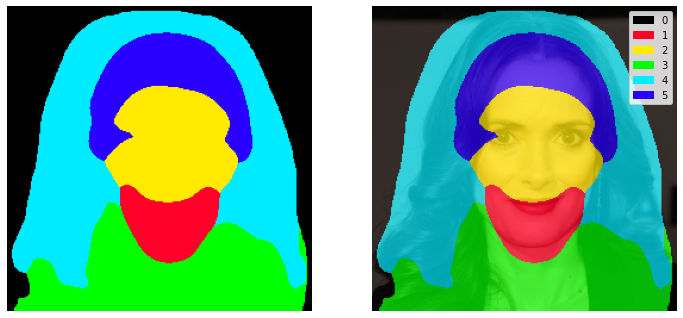

In [22]:
source_image = imageio.imread('/content/gdrive/My Drive/motion-supervised-co-segmentation/27.png')
source_image = resize(source_image, (256, 256))[..., :3]
visualize_segmentation(source_image, segmentation_module, hard=True)
plt.show()

**TASK: Apply the face alignment method to videos. Record a video and save the aligned video into a new MP4 file.**

Copy this notebook on your local Google Drive and rename it to Face_Alignment_Team_X where X is either A or B

**Hint: Extract frames from video**